In [1]:
from networkx_graph import RepresentativesGraph
import networkx as nx # Para redes en general
from networkx.readwrite import json_graph
from dispa import DisparityFilter2
from procesador_votaciones import ProcesadorDeVotaciones
from heavy_graph_maker import HeavyGraphMaker

import matplotlib.pylab as plt # Para graficar networkx y demases
import matplotlib.cm as cm # para mapas de colores
import numpy as np
from sklearn.metrics import normalized_mutual_info_score as mis # Función para calcular información mutua
import cairo # Importo Cairo
import funciones as f


In [3]:
year = 2016
procesador = ProcesadorDeVotaciones(year,year+1, 'data')
congress = procesador.procesar()
maker = HeavyGraphMaker(congress)
red = maker.create_year_network(year)
red_nx = red.graph
nodos = red_nx.edges()
print(len(nodos))

#red_igraph = ig.Graph.TupleList(red.edges(), directed=False)


Loading from data/2016/1
Loading from data/2016/2
Loading from data/2016/3
Loading from data/2016/4
Loading from data/2016/5
Loading from data/2016/6
Loading from data/2016/7
Loading from data/2016/8
Loading from data/2016/9
Loading from data/2016/10
Loading from data/2016/11
Getting data/2016/12 from API
Loading from data/2017/1
Loading from data/2017/2
Loading from data/2017/3
Loading from data/2017/4
Loading from data/2017/5
Loading from data/2017/6
Loading from data/2017/7
Loading from data/2017/8
Loading from data/2017/9
Loading from data/2017/10
Loading from data/2017/11
Getting data/2017/12 from API
(2016,)
2016
<class 'int'>
33411


In [5]:
disp_filt = DisparityFilter2(red_nx)
grafo_cortado = disp_filt.disparity_filter_alpha_cut(alpha_t=0.3)

C:\Users\Luna\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


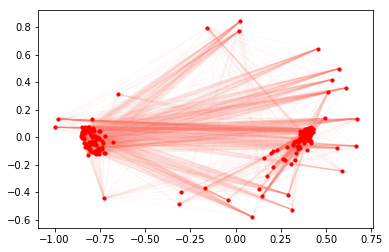

In [6]:
pos = nx.spring_layout(grafo_cortado)
nx.draw_networkx_nodes(grafo_cortado, pos, node_color='red',  with_labels=False, node_size=10, cmap=plt.cm.jet)

nx.draw_networkx_edges(grafo_cortado, pos, alpha=0.05,edge_color = 'salmon')

In [8]:
red = grafo_cortado
print(len(red.edges()))
print(f'la cantidad de nodos en la componente gigante es {len(list(nx.connected_component_subgraphs(red))[0])}')

12569
la cantidad de nodos en la componente gigante es 259


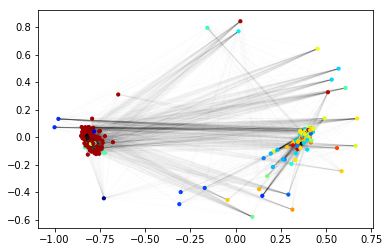

In [21]:

nodes = list(red.nodes())
grupos = [list(n.parties[2016])[0] for i,n in enumerate(nodes)]
    #groups = set([gr.text for gr in list(grupos])
mapping = dict(zip((set(grupos)),range(len(grupos))))

    
colors = [mapping[grupos[i]] for i,n in enumerate(nodes)]
    
    # drawing nodes and edges separately so we can capture collection for colobar
ec = nx.draw_networkx_edges(red, pos,alpha=0.01)
nc = nx.draw_networkx_nodes(red, pos, nodelist=nodes, node_color=colors, with_labels=False, node_size=10, cmap=plt.cm.jet)
    

el peso minimo es 34


No handles with labels found to put in legend.


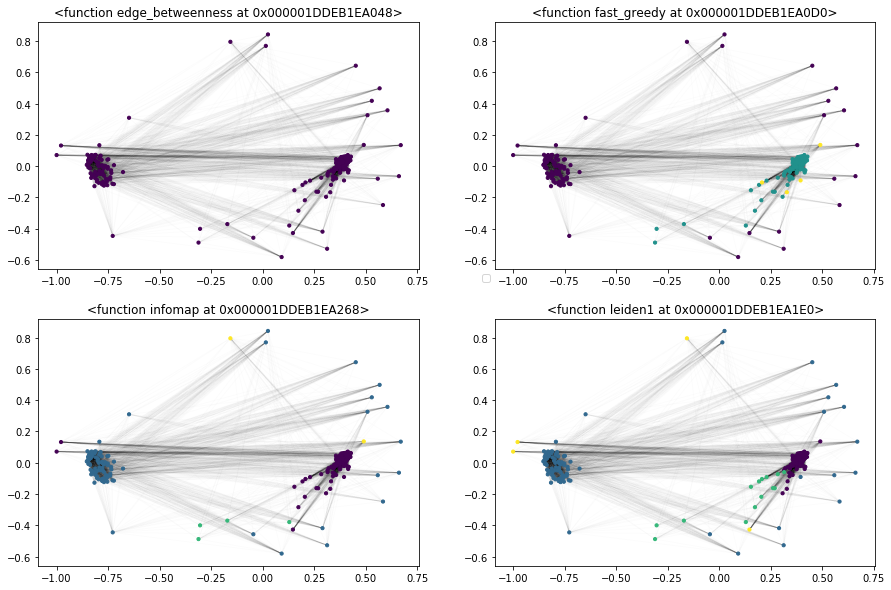

In [27]:
array_funciones = [f.edge_betweenness,f.fast_greedy,f.infomap,f.leiden1]
weight = []
for e in red.edges():
    red[e[0]][e[1]]['weight'] = red[e[0]][e[1]]['weight'] +33
    weight.append(red[e[0]][e[1]]['weight'])
    
print(f'el peso minimo es {min(weight)}')
fig, axs = plt.subplots(2,2, figsize=(15,10))
axs = axs.flatten()
#f. tight_layout(pad=3.0)

for i,metodo in enumerate(array_funciones):
    particion = metodo(red,weight)
    colores = f.colores_hex(max(particion.values())+1) #funcion que devuelve n colores

    #nx.draw(Red_delfines, node_size= 100, ax = axs[i], node_color = node_color,pos=posiciones, node_shape = aShape,  nodelist = node_list)
    nx.draw_networkx_nodes(red, ax = axs[i],node_size=10, node_color=list(particion.values()),nodelist = list(particion.keys()),pos=pos)
    nx.draw_networkx_edges(red, ax = axs[i], width=1.0, alpha=0.01,pos=pos)
    axs[i].set_title(metodo)
plt.legend(bbox_to_anchor=(0, 1.2))
plt.show()